ME200, Johannes Ruf and Luitgard Veraart

# Day 4: Random number generation in Python and other Python topics

## On Python's random number generator

Let us simulate a few uniformly distributed samples.

In [2]:
import numpy as np

In [3]:
sample_size = 20

In [4]:
samples = np.random.random(size=sample_size)

Let us check whether these numbers also display the lattice structure of the linear congruential generator.

In [6]:
import matplotlib.pyplot as plt

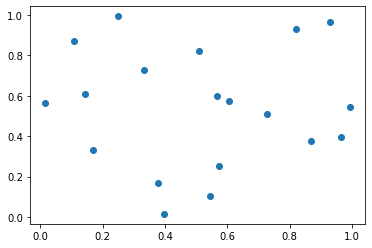

In [56]:
fig, ax = plt.subplots()
ax.scatter(samples[:-1], samples[1:]);     
# samples[:-1] are all the samples except the last one; 
# samples[1:] are all the samples except the first one;
# hence this plots on the x-axis the value of a sample and on the y-axis the next sample

We can’t detect any lattice structure here. Indeed, Python uses more sophisticated random number generators than the linear congruential one.

## Seeding Python's random number generator

If we execute the following code twice, we get different values; indeed these are different (pseudo-) random realizations. Also, all of us will get different values.

In [14]:
np.random.random(size=5)

array([0.4739058 , 0.68766642, 0.21313736, 0.98672097, 0.28819316])

Any random number generator is actually a deterministic (but very complicated) function of a seed.

To see this let us now do a slightly cleaner version of Python code than we have used so far. To this end, we first define a random number generator (rng):

In [24]:
rng = np.random.default_rng()

Instead of `random.random` we can now just use:

In [28]:
rng.random()

0.11306773964090411

Similarly, instead of `random.normal` we can now just use:

In [29]:
rng.normal()

0.6216468411013351

etc, etc.

Now, let us introduce the random number generator with additional `seed` argument:

In [31]:
rng = np.random.default_rng(seed=12345)

In [33]:
rng.random(size=5)

array([0.31675834, 0.79736546, 0.67625467, 0.39110955, 0.33281393])

Now, we all get the same numbers!

If we seed again (with the same number), and run the random number geneartor once more, we also get the same numbers:

In [34]:
rng = np.random.default_rng(seed=12345)
rng.random(size=5)

array([0.22733602, 0.31675834, 0.79736546, 0.67625467, 0.39110955])

In general, when developing a Python program, it’s good practice to set a seed. This allows reproducibility and helps finding mistakes.

## Functions

Python allows to define functions. 
Python code is better structured by defining functions.

The basic syntaxis is  *def name_function: ---  return(---)*

Here is an example:

In [87]:
def M(t=0):
    return np.exp(t**2/2)

 * Now $M$ represents the function $t \mapsto \mathrm{e}^{t^2/2}$.
 * The ``= 0'' says that the standard argument is zero
 * Note the colon after the arguments, and note that the next line is indented
 * The following code evaluates M at zero, then at one,  and then at the values $0, 1, 2, 3, 4, 5$. Finally it plots the graph of M from -3 to 3

In [43]:
print(M())    # or print(M(0))
print(M(1))
print(M(np.arange(6)))

1.0
1.6487212707001282
[1.00000000e+00 1.64872127e+00 7.38905610e+00 9.00171313e+01
 2.98095799e+03 2.68337287e+05]


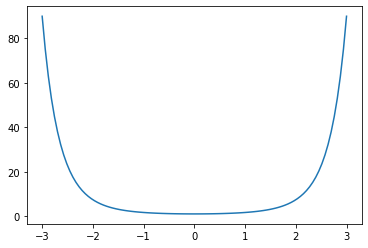

In [44]:
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 100)
y = M(x)
fig, ax = plt.subplots()
ax.plot(x, y);

We will use functions quite a lot; they are very useful.

Here just one more example: the function $f(x,y) = x*y^3 - \frac{\cos(x)}{\pi}$.

In [83]:
def f(x, y):
    return x * y**3 - np.cos(x) / np.pi

In [84]:
f(4, 3)

108.20806122656185

There are many possibilities to define such a function. Here is an alternative way:

In [85]:
def f(x, y):
    z = np.cos(x) / np.pi
    return x * y**3 - z

In [86]:
f(4, 3)

108.20806122656185

## Control structures in Python, part I: for loops

 A loop allows us to repeat a sequence of commands. For example:

In [45]:
vector = np.array([1, 3, 5, 7])

for x in vector:
    print(x**2)

1
9
25
49


When possible, however, we should try and avoid for loops (as they can be very slow). The following code achieves the same and is faster:

In [47]:
print(vector**2)

[ 1  9 25 49]


One strength of `numpy` is that it handle vectors very well. Hence, whenever we can write some repeated computations in a vectorized version, this should be done to avoid for loops.

## Implementation of a linear congruential generator

Recall the algorithm for the LCG:

\begin{align*}
x_{i+1} &= a x_i \bmod m;\\ 
u_{i+1} &= \frac{x_{i+1}}{m}.
\end{align*} 

In [101]:
def lcg(m, a,seed, sample_size=10):
    rng = np.array([])
    x = seed
    for i in range(sample_size):
        x = (a * x) % m 
        rng = np.append(rng, x / m)
    return rng

Let's consider again $a=6$, $m=11$, $x_0=1$. Let's plot consecutive overlapping pairs $(u_1, u_2), (u_2, u_3), \cdots , (u_{10}, u_{11})$.

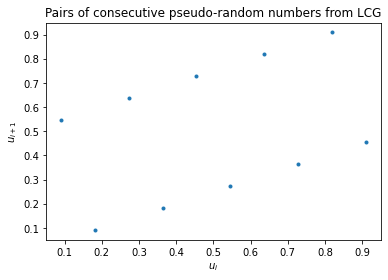

In [103]:
pseudo_random_sequence = lcg(11, 6, 1, 11)

_, ax = plt.subplots()
ax.plot(pseudo_random_sequence[: -1], pseudo_random_sequence[1:], '.')
ax.set_xlabel('$u_{i}$');  ax.set_ylabel('$u_{i+1}$');
ax.set_title('Pairs of consecutive pseudo-random numbers from LCG');

*  The ten points lie on just two parallel lines through the unit square (with $u_i$ on $x$-axis and $u_{i+1}$ on $y$-axis). 
* This lattice structure distinguishes those samples from genuine random numbers. 

## The inverse transform method in Python for exponentially distributed random variables

$F(x) = 1 - \exp(-x) (for x >= 0)$
the inverse is  $-log(1-u)$

In [63]:
sample_size = 100_000    
# just another way to write 100000; we can always include under scores when writing long integers

rng = np.random.default_rng(seed=12345) 
u = rng.random(size=sample_size)
samples = -np.log(u) #because 1-u is also uniformly distributed

In [ ]:
##np.random.seed(1352453)
##u = np.random.random(sample_size)

The `numpy` package could also do this directly:

In [64]:
samples_numpy = rng.exponential(size=sample_size)

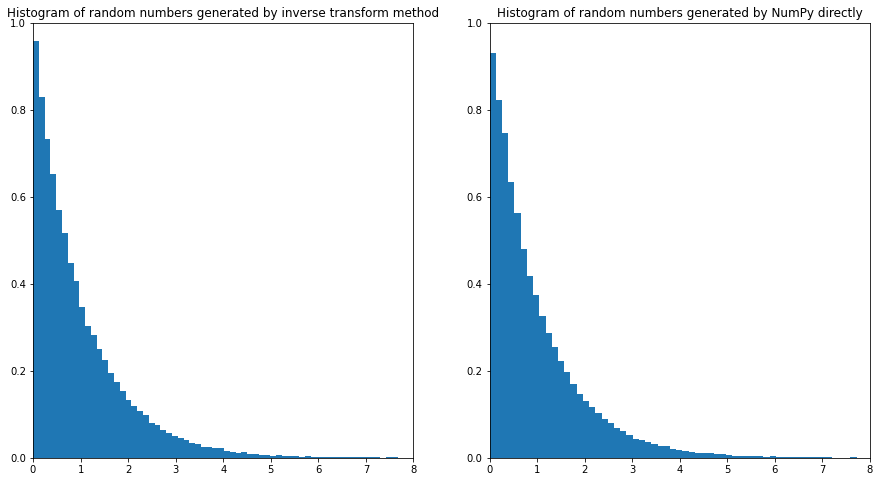

In [65]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
axs[0].hist(samples, bins=100, density=True);    # density argument changes the y-label. experiment!
axs[0].set_title('Histogram of random numbers generated by inverse transform method')
axs[1].hist(samples_numpy, bins=100, density=True);
axs[1].set_title('Histogram of random numbers generated by NumPy directly');
for ax in axs:                 # doing the same thing for both panels ('axes')
    ax.set_ylim([0, 1]);       # changing the limits on the y axis
    ax.set_xlim([0, 8]);

We observe the two histograms look very similar, as expected. Let's check mean and standard deviations.

In [75]:
print(f'The mean and standard deviation of the sample generated by the inverse transform method are',
      f'{np.mean(samples):.4f} and {np.std(samples):.4f}.')
print(f'The mean and standard deviation of the sample generated by NumPy                        are',
      f'{np.mean(samples_numpy):.4f} and {np.std(samples_numpy):.4f}.')

#note the colon followed by 4f.  It means that the numbers are rounded to 4 digits.

The mean and standard deviation of the sample generated by the inverse transform method are 0.9988 and 0.9982.
The mean and standard deviation of the sample generated by NumPy                        are 0.9962 and 0.9963.


In [1]:
import numpy as np

In [2]:
np.random.default_rng()

Generator(PCG64) at 0x11128C7C8